In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
plt.style.use("ggplot")

In [2]:
mnistData = load_data()

11501568/11490434 [==============================] - 11s 1us/step


In [3]:
mnistData

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(x_train,y_train),(x_test,y_test) = mnistData

In [6]:
x_train.shape,x_test.shape,y_test.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

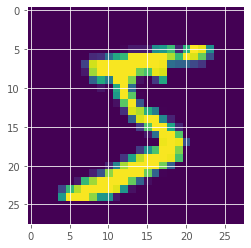

In [12]:
plt.imshow(x_train[0])   # [면, 행, 열]
plt.show()

In [18]:
y_train[0]

5

In [19]:
y_train  # y값을 인코딩해야함.

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
y_trainOne = to_categorical(y_train)
y_trainOne

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [26]:
x_train.shape

(60000, 28, 28)

In [29]:
x_trainM = x_train.reshape(60000,-1, )  # 2차원으로 변경
x_trainM.shape

(60000, 784)

In [35]:
model = Sequential()
model.add(Dense(units=64, input_dim = 784, activation='relu' )  )
model.add(Dense(units=32, input_dim = 64, activation='relu' )  )
model.add(Dense(units=10, input_dim = 32, activation='softmax' )  )

model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_trainM, y_trainOne,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 783us/step - loss: 1.5837 - acc: 0.7656
Epoch 2/10
1875/1875 [==============================] - 1s 780us/step - loss: 0.4468 - acc: 0.8950
Epoch 3/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.3087 - acc: 0.9258
Epoch 4/10
1875/1875 [==============================] - 1s 776us/step - loss: 0.2249 - acc: 0.9430
Epoch 5/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.1902 - acc: 0.9506
Epoch 6/10
1875/1875 [==============================] - 1s 777us/step - loss: 0.1609 - acc: 0.9577
Epoch 7/10
1875/1875 [==============================] - 1s 763us/step - loss: 0.1432 - acc: 0.9626
Epoch 8/10
1875/1875 [==============================] - 1s 777us/step - loss: 0.1261 - acc: 0.9666
Epoch 9/10
1875/1875 [==============================] - 1s 768us/step - loss: 0.1179 - acc: 0.9679
Epoch 10/10
1875/1875 [==============================] - 1s 768us/step - loss: 0.1105 - acc: 0.9706


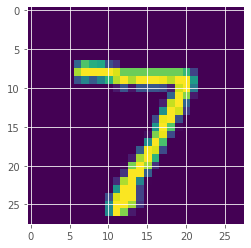

In [36]:
plt.imshow(x_test[0])

In [38]:
x_test[0].shape

(28, 28)

In [43]:
model.predict( x_test[0].reshape(1,-1)).argmax(axis=1) 

array([7], dtype=int64)

In [47]:
x_test.shape, y_test.shape     #  x_test를 수정해야함

((10000, 28, 28), (10000,))

In [55]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [49]:
x_test.reshape(-1,28*28)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [53]:
x_test.reshape(-1,28*28).argmax(axis=1)

array([355,  97, 406, ..., 711, 464,  75], dtype=int64)

In [51]:
y_test = to_categorical(y_test)

In [57]:
model.evaluate(x_test.reshape(-1,28*28),y_test)

313/313 [==============================] - 0s 829us/step - loss: 0.2143 - acc: 0.9544


[0.2142833024263382, 0.9544000029563904]

In [58]:
mnistData = load_data()

(x_train,y_train),(x_test,y_test) = mnistData

x_train.shape


 # onehot인코딩 안하는 방법
 ## Flatten -> 1차원
 ## sparse_categorical_crossentropy

In [63]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(units=64,  activation='relu' )  )
model.add(Dense(units=32,  activation='relu' )  )
model.add(Dense(units=10,  activation='softmax' )  )

model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 840us/step - loss: 1.8359 - acc: 0.8239
Epoch 2/10
1875/1875 [==============================] - 2s 806us/step - loss: 0.3319 - acc: 0.9162
Epoch 3/10
1875/1875 [==============================] - 1s 797us/step - loss: 0.2420 - acc: 0.9356
Epoch 4/10
1875/1875 [==============================] - 1s 799us/step - loss: 0.2030 - acc: 0.9459
Epoch 5/10
1875/1875 [==============================] - 2s 848us/step - loss: 0.1647 - acc: 0.9545
Epoch 6/10
1875/1875 [==============================] - 2s 855us/step - loss: 0.1478 - acc: 0.9586
Epoch 7/10
1875/1875 [==============================] - 2s 933us/step - loss: 0.1300 - acc: 0.9635
Epoch 8/10
1875/1875 [==============================] - 2s 854us/step - loss: 0.1200 - acc: 0.9663
Epoch 9/10
1875/1875 [==============================] - 2s 829us/step - loss: 0.1160 - acc: 0.9664
Epoch 10/10
1875/1875 [==============================] - 2s 900us/step - loss: 0.1058 - acc: 0.9698


In [64]:
model.predict( x_test )

array([[3.6136591e-10, 2.5305143e-04, 2.1982378e-05, ..., 9.9967086e-01,
        7.2612233e-06, 3.9866485e-05],
       [8.6652960e-08, 2.0300411e-06, 9.9996924e-01, ..., 1.7650628e-06,
        2.4436080e-05, 1.4869826e-08],
       [2.0660894e-16, 9.9999976e-01, 1.2505336e-10, ..., 2.8664218e-07,
        1.9543605e-22, 2.1052074e-17],
       ...,
       [1.1005100e-15, 2.5031547e-06, 3.7858148e-14, ..., 1.2665504e-05,
        9.5520569e-10, 2.0293912e-06],
       [8.3457478e-18, 2.9258997e-20, 1.9324808e-25, ..., 1.0496674e-15,
        3.5277484e-12, 2.6249088e-22],
       [2.0152767e-10, 1.3639767e-17, 3.2471835e-14, ..., 2.6960184e-10,
        2.5244856e-10, 8.0488123e-09]], dtype=float32)

In [71]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [70]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [73]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [75]:
x_test[0].shape

(28, 28)

In [77]:
x_test[0].reshape(1,28,28).argmax(axis=1)

array([[ 0,  0,  0,  0,  0,  0,  8,  8,  8,  8,  8, 25,  9, 21,  9,  9,
         9, 15, 13, 12,  9,  9,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [80]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

array([7], dtype=int64)

In [83]:
model.predict(x_test).argmax(axis=1) # => x 전체 예측값

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [86]:
model.evaluate(x_test,y_test) # 손실, 정확도

313/313 [==============================] - 0s 844us/step - loss: 0.1540 - acc: 0.9627


[0.1539563238620758, 0.9627000093460083]

# 텐서


In [22]:
mnistData = load_data()

(x_train,y_train),(x_test,y_test) = mnistData

x_train.shape

(60000, 28, 28)

In [24]:
x_trainM = x_train.reshape(60000, -1 )  
x_trainM.shape

(60000, 784)

In [26]:
y_trainOne = to_categorical(y_train)
y_trainOne

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [31]:
x_trainM = tf.cast(x_trainM, dtype=tf.float32)

In [6]:
y_train.shape

(60000,)

In [27]:
x_trainM.shape, y_trainOne.shape

((60000, 784), (60000, 10))

In [8]:
# x = tf.constant(x_trainM, tf.float32)
# y= tf.constant(y_trainOne, tf.float32)

In [28]:
initX = tf.initializers.GlorotUniform()
w1 = tf.Variable(initX(shape=[784,64]))
b1 = tf.Variable(initX(shape = [64]))
w2 = tf.Variable( initX( shape=[64,32] ) )
b2 = tf.Variable( initX( shape=[32] ) )
w3 = tf.Variable( initX( shape=[32,10] ) ) #1은 남겨야 한다.
b3 = tf.Variable( initX( shape=[10] ) ) 

In [29]:
def compute_loss():
    z1 = tf.matmul( x_trainM, w1) + b1
    hx1 = tf.nn.relu( z1 ) 
    z2 = tf.matmul( hx1, w2 ) + b2
    hx2 = tf.nn.relu( z2 )
    z = tf.matmul( hx2, w3 ) + b3
    
    cost_i = tf.nn.softmax_cross_entropy_with_logits( logits=z, labels = y_trainOne)
    cost = tf.reduce_mean( cost_i)
    return cost

In [32]:
optimizer = Adam( learning_rate=0.01)
for i in range(1000):
    optimizer.minimize( compute_loss, var_list=[w1,w2,w3, b1,b2,b3])
    print( i, compute_loss().numpy() )

0 109.69725
1 156.19449
2 76.10342
3 61.805832
4 45.142532
5 31.37004
6 26.752617
7 23.801325
8 17.223595
9 10.230279
10 8.180403
11 9.964474
12 10.05165
13 8.176628
14 6.398304
15 5.385572
16 4.9647927
17 4.7651052
18 4.5242887
19 4.144628
20 3.692338
21 3.275035
22 2.9627032
23 2.7440085
24 2.5735304
25 2.419759
26 2.2754734
27 2.1432493
28 2.0356493
29 1.9581227
30 1.899077
31 1.8474138
32 1.7995292
33 1.760014
34 1.732246
35 1.7120911
36 1.6978949
37 1.6864078
38 1.6753902
39 1.6647029
40 1.6537969
41 1.6429361
42 1.6312532
43 1.6191941
44 1.607195
45 1.5949703
46 1.5826995
47 1.5705706
48 1.5584013
49 1.5451972
50 1.5315764
51 1.5182425
52 1.5059172
53 1.4946398
54 1.4840609
55 1.4741507
56 1.4646674
57 1.4549778
58 1.4456242
59 1.4358196
60 1.4260776
61 1.4166074
62 1.4075357
63 1.3987954
64 1.390283
65 1.3817765
66 1.3737974
67 1.3665609
68 1.3593247
69 1.3521185
70 1.3448235
71 1.337463
72 1.3300302
73 1.3227463
74 1.3156842
75 1.3086545
76 1.301746
77 1.294936
78 1.2882494
79 

583 0.3079978
584 0.30751306
585 0.30703926
586 0.3065654
587 0.30608475
588 0.30559915
589 0.30512443
590 0.30465153
591 0.3041757
592 0.3037132
593 0.30325136
594 0.30279583
595 0.30232725
596 0.30187494
597 0.30139413
598 0.30091843
599 0.30044037
600 0.299966
601 0.29950106
602 0.2990362
603 0.29857102
604 0.29812256
605 0.2976802
606 0.29723775
607 0.29678914
608 0.29634506
609 0.29589957
610 0.29546985
611 0.2950309
612 0.2945679
613 0.29415482
614 0.2937032
615 0.29331258
616 0.2928875
617 0.2924588
618 0.2920753
619 0.29163587
620 0.29122576
621 0.29083443
622 0.29041398
623 0.2900264
624 0.2896126
625 0.2892138
626 0.28880528
627 0.2884275
628 0.28803855
629 0.28765044
630 0.28727037
631 0.28688073
632 0.28648973
633 0.28609022
634 0.28569606
635 0.28530052
636 0.28491348
637 0.2845319
638 0.28416023
639 0.28378463
640 0.28340274
641 0.28301933
642 0.28263217
643 0.28223807
644 0.2818539
645 0.28147238
646 0.28109038
647 0.28072023
648 0.28033412
649 0.27993265
650 0.2795396
6

In [33]:
def hxfn(xdata):
    xd = tf.constant(xdata, tf.float32)
    z1 = tf.matmul(xd, w1)+b1
    hx1 = tf.nn.relu( z1 ) 
    z2 = tf.matmul( hx1, w2 ) + b2
    hx2 = tf.nn.relu( z2 )
    z = tf.matmul( hx2, w3 ) + b3
    hx = tf.nn.softmax(z)
    return(hx.numpy()>0.5) +0

In [34]:
pred = hxfn(x_trainM).argmax(axis = 1)

In [35]:
(pred ==y_train).mean()

0.9404666666666667